<a href="https://colab.research.google.com/github/lucas-azdias/Scripts-Universidade/blob/main/Python/Aprendizagem%20de%20M%C3%A1quina/10/Deep%20Learning/Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Deep Learning

In [1]:
import tensorflow as tf
import cv2
import numpy as np

## Benchmark Datasets

In [2]:
from tensorflow.keras.datasets import cifar10,fashion_mnist, mnist

#classes cifar
cifar_names = ["Avião", "Automóvel", "Pássaro", "Gato", "Cervo",
    "Cachorro", "Sapo", "Cavalo", "Navio", "Caminhão"]


#classes fashion_mnist
fashion_names = ["T-shirt/top","Trouser","Pullover","Dress",
"Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

#classes mnist
mnist_names = ["0","1","2","3","4","5","6","7","8","9"]


# Carregar o conjunto de dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()
class_names = mnist_names
x_test_ori = x_test
# Exibir as dimensões dos conjuntos de treinamento e teste
print("Dimensões do conjunto de treinamento:")
print("Imagens de treinamento:", x_train.shape)
print("Labels de treinamento:", y_train.shape)
print()
print("Dimensões do conjunto de teste:")
print("Imagens de teste:", x_test.shape)
print("Labels de teste:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dimensões do conjunto de treinamento:
Imagens de treinamento: (60000, 28, 28)
Labels de treinamento: (60000,)

Dimensões do conjunto de teste:
Imagens de teste: (10000, 28, 28)
Labels de teste: (10000,)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Função para plotar as imagens
def plot_images(images, labels, cmap = 'color'):
    # Configurar o grid para exibir as imagens
    fig, axes = plt.subplots(3, 3, figsize=(6, 4))
    axes = axes.flatten()

    # Iterar sobre as imagens e os rótulos
    for i, (image, label) in enumerate(zip(images, labels)):
        # Exibir a imagem
        names = class_names[int(label)]
        axes[i].imshow(image, cmap = cmap)
        axes[i].axis('off')
        axes[i].set_title(f"{names}")

    # Ajustar o espaçamento entre as subplots
    plt.tight_layout()
    plt.show()

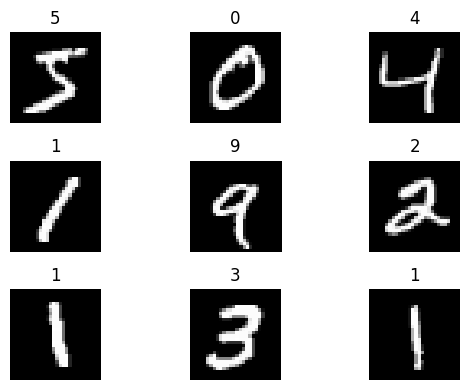

In [4]:
plot_images(x_train[:9],y_train[:9], cmap='gray')

#Visualizando pixel a pixel

Você consegue enxergar o pixel '3' ?

In [5]:
temp = x_train[7]

#temp[temp > 0] = 1

for i in range(temp.shape[1]):
  for j in range(temp.shape[0]):
    print(temp[i][j],end=' ')
  print()

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 38 43 105 255 253 253 253 253 253 174 6 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 43 139 224 226 252 253 252 252 252 252 252 252 158 14 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 178 252 252 252 252 253 252 252 252 252 252 252 252 59 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 109 252 252 230 132 133 132 132 189 252 252 252 252 59 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 4 29 29 24 0 0 0 0 14 226 252 252 172 7 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 85 243 252 252 144 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 88 189 252 252 252 14 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 91 212 247 252 252 252 204 9 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 32 125 193 193 193 253 252 252 252 238 102 28 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 45 222 252 252 252 252

#Convolução

Vamos aplicar um filtro para detectar bordas / texturas nas imagens

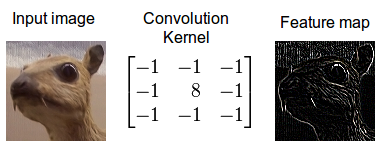

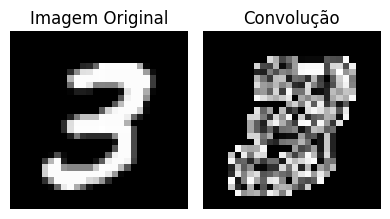

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from scipy.ndimage import convolve

# Carregar a imagem

image = x_train[7]

if len(image.shape) > 2 and image.shape[2] != 1:
# Converter a imagem para escala de cinza
    image = color.rgb2gray(image)

# Definir o kernel da convolução
kernel = np.array([[-1, -1, -1],
                   [-1 ,8, -1],
                   [-1, -1, -1]])

# Aplicar a convolução na imagem em escala de cinza
convolved_image = convolve(image, kernel)


# Exibir a imagem original e a convolução
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4, 3))
axes[0].imshow(image,cmap='gray')
axes[0].set_title("Imagem Original")
axes[0].axis('off')
axes[1].imshow(convolved_image, cmap='gray')
axes[1].set_title("Convolução")
axes[1].axis('off')
plt.tight_layout()
plt.show()

Aqui uma função para auxiliar a visualização das imagens resultantes

In [7]:
#Função auxiliar para plotar imagens lado a lado a parti de uma lista
def plot_sidebyside(img_list,titles,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)

  for i in range(n):
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()

O código abaixo utiliza a biblioteca opencv para extrair diferentes features

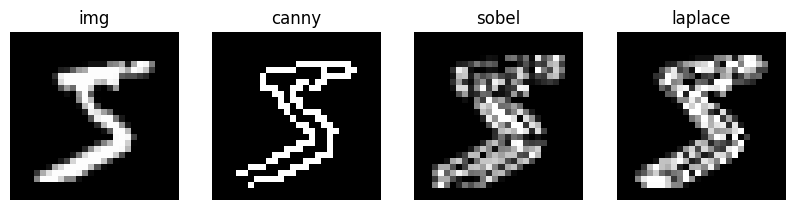

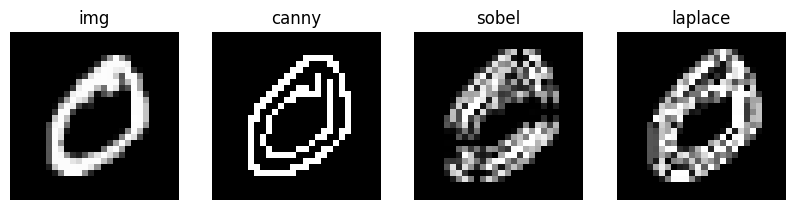

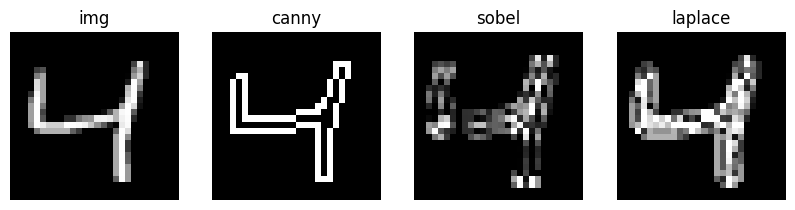

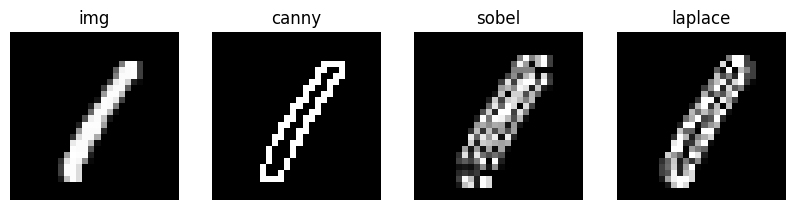

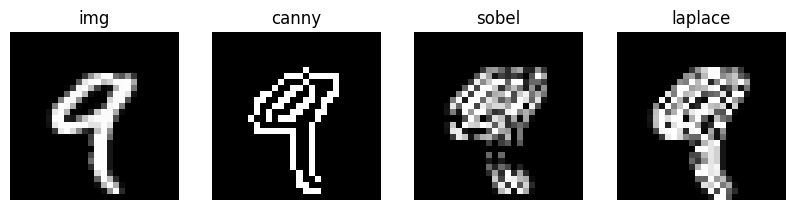

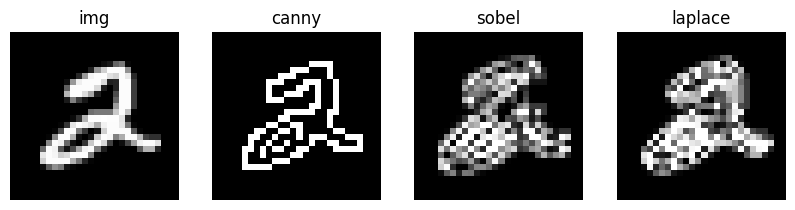

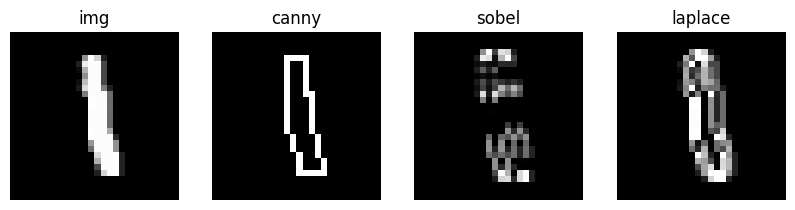

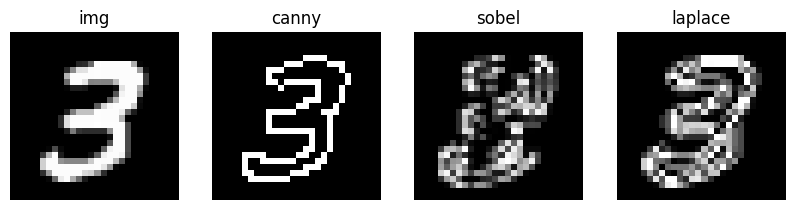

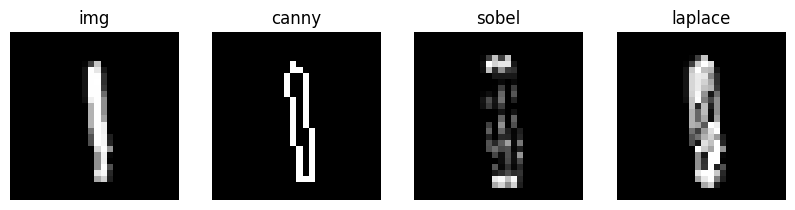

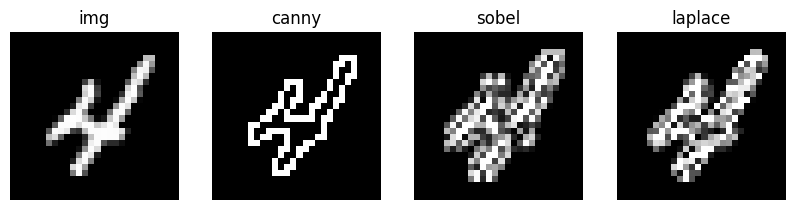

In [8]:
def extract_edges(data,algorithm='canny'):
  features = []


  for img in data:
    #Evaluate smooth on fashion mnist data
    #img = cv2.GaussianBlur(img,(5,5),0)
    #_,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    if algorithm=='canny':
      edges = cv2.Canny(img,100,200)

    elif algorithm=='sobel':
                                      #V H
      edges = cv2.Sobel(img,cv2.CV_64F,1,1)
      #Back to UINT8
      edges = cv2.convertScaleAbs(edges)

    elif algorithm=='laplace':
      edges = cv2.Laplacian(img,cv2.CV_64F)
      #Back to UINT8
      edges = cv2.convertScaleAbs(edges)

    features.append(edges)

  return np.array(features)

train_feat_canny = extract_edges(x_train,'canny')
test_feat_canny = extract_edges(x_test,'canny')

train_feat_sobel = extract_edges(x_train,'sobel')
test_feat_sobel = extract_edges(x_test,'sobel')

train_feat_laplace = extract_edges(x_train,'laplace')
test_feat_laplace = extract_edges(x_test,'laplace')

for canny,sobel,laplace,img in zip(train_feat_canny[:10],train_feat_sobel[:10],train_feat_laplace[:10],x_train[:10]):
  plot_sidebyside([img,canny,sobel,laplace],['img','canny','sobel','laplace'],'gray',figsize=(10,6))

#Classificadores rasos

Vamos diminuir nosso dataset para apenas 10000 amostra para agilizar o processo de treinamento.

Também vamos experimentar diferentes features.



In [9]:
def performance_evaluation(y_test, predictions,samples,cls_names,info_message):

  print(f"Evaluation of ", info_message)
  print(f"{classification_report(y_test, predictions)}\n")
  print(cls_names)
  disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
  disp.figure_.suptitle("Confusion Matrix")
  plt.show()

  id = np.random.randint(300)
  idx1,idx2=id,id+10
  diff = y_test - predictions
  idxs = np.where(diff == 0)

  _, axes = plt.subplots(nrows=1, ncols=(idx2-idx1), figsize=(20, 10))
  for ax, image, lbl, prediction, in zip(axes, samples[idxs],y_test[idxs], predictions[idxs]):
      ax.set_axis_off()
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
      ax.set_title(f"Lbl: {lbl} Pred: {prediction}")


  idxs = np.where(diff != 0)
  _, axes = plt.subplots(nrows=1, ncols=(idx2-idx1), figsize=(20, 10))
  for ax, image, lbl, prediction, in zip(axes, samples[idxs],y_test[idxs], predictions[idxs]):
      ax.set_axis_off()
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
      ax.set_title(f"Lbl: {lbl} Pred: {prediction}")

  plt.show()

(10000, 784)
Evaluation of  Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       980
           1       0.87      0.93      0.90      1135
           2       0.70      0.62      0.66      1032
           3       0.55      0.56      0.55      1010
           4       0.65      0.67      0.66       982
           5       0.55      0.51      0.53       892
           6       0.78      0.73      0.75       958
           7       0.72      0.77      0.75      1028
           8       0.57      0.55      0.56       974
           9       0.67      0.69      0.68      1009

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


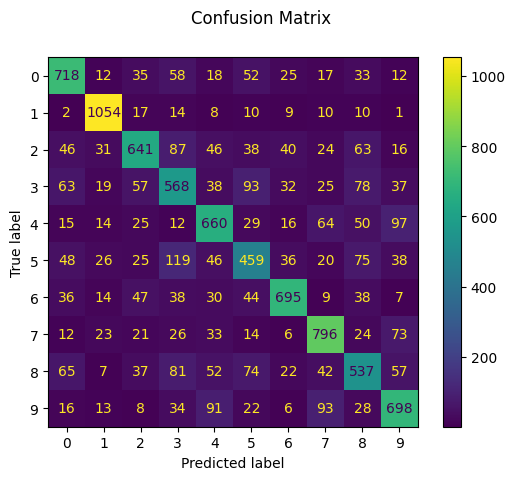

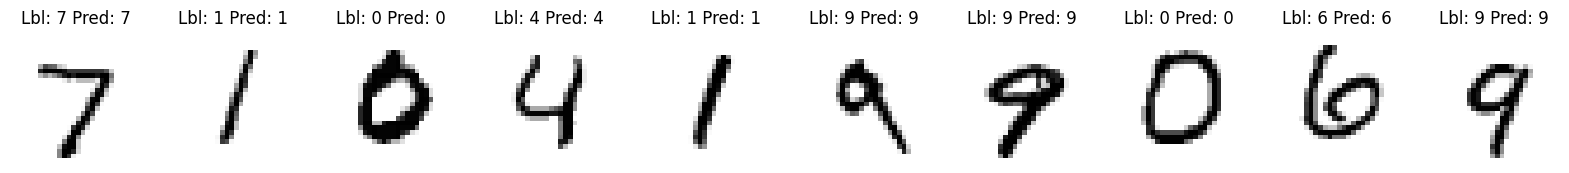

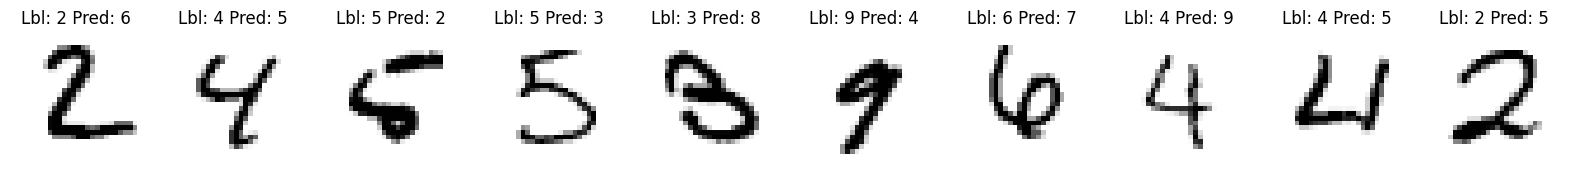

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

x_train = train_feat_sobel[:10000]
y_train = y_train[:10000]

x_test = test_feat_sobel

#(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Redimensiona de uma matriz MxN para um vetor M*N features
x_train_flatten = x_train.reshape((x_train.shape[0],-1))
x_test_flatten = x_test.reshape((x_test.shape[0],-1))
print(x_train_flatten.shape)

# Árvore de Decisão
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_flatten, y_train)
y_pred = dt_classifier.predict(x_test_flatten)


performance_evaluation(y_test,y_pred, x_test_ori, class_names,"Decision Tree")

Evaluation of  MLP
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       980
           1       0.93      0.94      0.94      1135
           2       0.79      0.77      0.78      1032
           3       0.73      0.74      0.74      1010
           4       0.76      0.76      0.76       982
           5       0.73      0.68      0.70       892
           6       0.84      0.89      0.86       958
           7       0.81      0.79      0.80      1028
           8       0.71      0.69      0.70       974
           9       0.74      0.75      0.74      1009

    accuracy                           0.79     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.79      0.79      0.79     10000


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


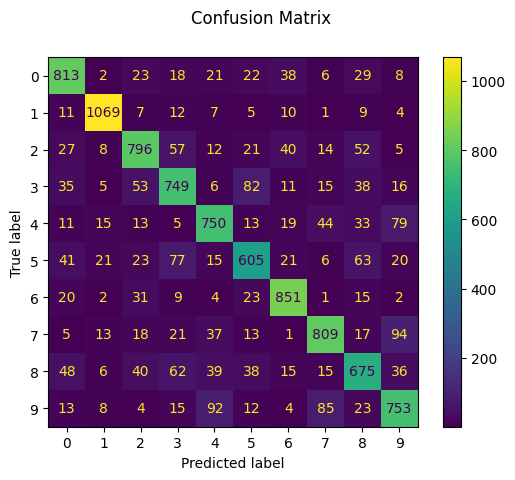

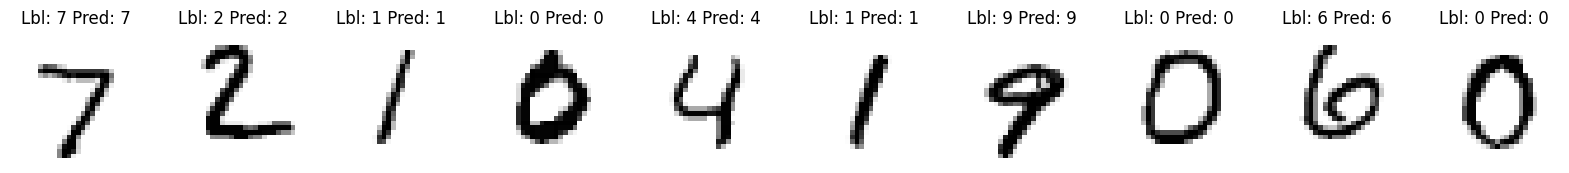

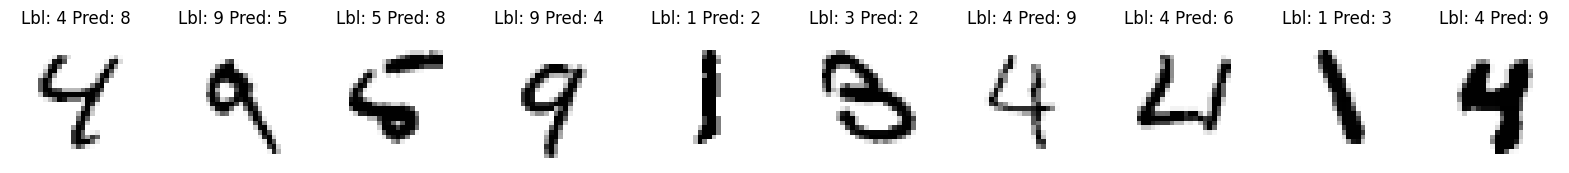

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100))
mlp.fit(x_train_flatten, y_train)
y_pred = mlp.predict(x_test_flatten)

performance_evaluation(y_test,y_pred, x_test_ori, class_names,"MLP")

In [ ]:
import tensorflow as tf
from tensorflow import keras

#Re lendo a base
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if len(x_train[0].shape) < 3:
  x_train = np.expand_dims(x_train,axis=-1)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

epochs=10

history = model.fit(x_train, y_train, batch_size=32,
                    epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 889,834 (3.39 MB)

 Trainable params: 889,834 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
 790/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7359 - loss: 1.6473

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1)

In [ ]:
performance_evaluation(y_test,y_pred, x_test, class_names,"CNN")